# Exercise 4. Exploratory Data Analysis (EDA)

## Task 1. Loading the dataset.
Load the dataset `2009_SCIENCE_GARDEN.csv` using the relative path provided. Display the first few rows of the data to understand its structure, and check for any missing values.

In [3]:
import pandas as pd

# Load the dataset using the relative path
data_path = '../../Meteo203-2526-Garibay/data/2009_SCIENCE_GARDEN.csv'
df = pd.read_csv(data_path)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            365 non-null    object 
 1   DAILY RAINFALL  359 non-null    float64
 2   TEMP MEAN       365 non-null    float64
 3   TEMP MAX        365 non-null    float64
 4   TEMP MIN        365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


#### Questions
1. Are there missing values in the dataset? Which columns contain these missing values?
2. Based on the first few rows, what variables are available in this dataset, and what types of data do they contain?

Some useful commands
- `df.head()`
- `df.isnull()`

Answer for Task 1:
1. Yes, there are missing values for DAILY RAINFALL. There must be 365 counts, but the daily rainfall only had 359 counts. It's on second column, Column 1 (if included Column 0).
2. The variables include Date (object), while Daily Rainfall, Temp Mean, Temp Max and Temp Min were floats.

In [2]:
df.head()
df.isnull()

,DATE,DAILY RAINFALL,TEMP MEAN,TEMP MAX,TEMP MIN
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
360,False,False,False,False,False
361,False,False,False,False,False
362,False,False,False,False,False
363,False,False,False,False,False


---
## Task 2: Summary Statistics
Calculate and interpret the summary statistics (mean, median, min, max, standard deviation) for each numeric column in the dataset. Remember, you can subset a specific column using the following syntax

```python
subset = df['COLUMN NAME HERE']
```

When you have your subset, you can then calculate the different summar statistics such as `mean`,  `median`, etc. 

For example 
```python
subset_mean = subset.mean()
```
If you want to operate from the df directly,

```python
subset_mean = df['COLUMN NAME HERE'].mean()
```


You can also choose to print out the summary statistics using `df.describe()`. The [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) lists other summary statistics that might be useful here.

In [24]:
# Calculate specific statistics for the "Daily Rainfall" column
rainfall_mean = df['DAILY RAINFALL'].mean()
rainfall_median = df['DAILY RAINFALL'].median()
rainfall_min = df['DAILY RAINFALL'].min()
rainfall_max = df['DAILY RAINFALL'].max()
rainfall_SD = df['DAILY RAINFALL'].std()

print(f"Mean Rainfall: {rainfall_mean:.2f}")
print(f"Median Rainfall: {rainfall_median:.2f}")
print(f"Minimum Rainfall: {rainfall_min:.2f}")
print(f"Maximum Rainfall: {rainfall_max:.2f}")
print(f"Standard Deviation Rainfall: {rainfall_SD:.2f}")

# Calculate specific statistics for the "Temp Mean" column
mean_temp_mean = df['TEMP MEAN'].mean()
mean_temp_median = df['TEMP MEAN'].median()
mean_temp_min = df['TEMP MEAN'].min()
mean_temp_max = df['TEMP MEAN'].max()
mean_temp_SD = df['TEMP MEAN'].std()

print(f"Mean of Mean Temperature: {mean_temp_mean:.2f}")
print(f"Median Mean Temperature: {mean_temp_median:.2f}")
print(f"Minimum Mean Temperature: {mean_temp_min:.2f}")
print(f"Maximum Mean Temperature: {mean_temp_max:.2f}")
print(f"Standard Deviation Mean Temperature: {mean_temp_SD:.2f}")

# Calculate specific statistics for the "Temp Min" column
min_temp_mean = df['TEMP MIN'].mean()
min_temp_median = df['TEMP MIN'].median()
min_temp_min = df['TEMP MIN'].min()
min_temp_max = df['TEMP MIN'].max()
min_temp_SD = df['TEMP MIN'].std()

print(f"Mean of Min Temperature: {min_temp_mean:.2f}")
print(f"Median Min Temperature: {min_temp_median:.2f}")
print(f"Minimum Min Temperature: {min_temp_min:.2f}")
print(f"Maximum Min Temperature: {min_temp_max:.2f}")
print(f"Standard Deviation Min Temperature: {min_temp_SD:.2f}")

# Calculate specific statistics for the "Temp Max" column
max_temp_mean = df['TEMP MAX'].mean()
max_temp_median = df['TEMP MAX'].median()
max_temp_min = df['TEMP MAX'].min()
max_temp_max = df['TEMP MAX'].max()
max_temp_SD = df['TEMP MAX'].std()

print(f"Mean of Max Temperature: {max_temp_mean:.2f}")
print(f"Median Max Temperature: {max_temp_median:.2f}")
print(f"Minimum Max Temperature: {max_temp_min:.2f}")
print(f"Maximum Max Temperature: {max_temp_max:.2f}")
print(f"Standard Deviation Max Temperature: {max_temp_SD:.2f}")

Mean Rainfall: 11.30
Median Rainfall: 0.25
Minimum Rainfall: 0.00
Maximum Rainfall: 454.91
Standard Deviation Rainfall: 35.61
Mean of Mean Temperature: 27.04
Median Mean Temperature: 27.22
Minimum Mean Temperature: 22.28
Maximum Mean Temperature: 30.78
Standard Deviation Mean Temperature: 1.52
Mean of Min Temperature: 23.41
Median Min Temperature: 23.89
Minimum Min Temperature: 18.11
Maximum Min Temperature: 27.50
Standard Deviation Min Temperature: 1.75
Mean of Max Temperature: 31.66
Median Max Temperature: 31.89
Minimum Max Temperature: 25.50
Maximum Max Temperature: 36.50
Standard Deviation Max Temperature: 2.07


### Questions:

1. What are the mean and median values for Daily Rainfall? Mean Temperature? Max Temperature? Minimum Temperature?
2. How does the mean compare to the median for each variable? What might this indicate about the data's distribution?
3. What is the maximum daily rainfall? How might this represent extreme weather events?

Answer to Task 2:
1. For rainfall, the mean is 11.30 and the median is 0.25. For mean temperature, the mean is 27.04 and the median is 27.22. For the maximum temperature, the mean is 31.66 while the median is 31.89. And for the minimum temperature, the mean is 23.41 while the median is 23.89.
2. For the rainfall, it is positively skewed or skewed to the right since the mean rainfall is greater than the median rainfall. But for all the temperatures, (min, mean and max), it is skewed to the left of negatively skewed, since the mean values (min, max, mean) were all less than the median values.
3. The maximum daily rainfall was 454.91 and it happened on Sept 27. This represent an extreme weather events because it is much higher than the average rainfall (11.30). If it happened o Sept 27, it is either a rainfall due to habagat or due to Tropical Cyclone or its combination.

---
## Task 3: Histogram for Rainfall Distribution
Create a histogram for `Daily Rainfall` to visualize its distribution. Look for any skewness or extreme values in the rainfall data.

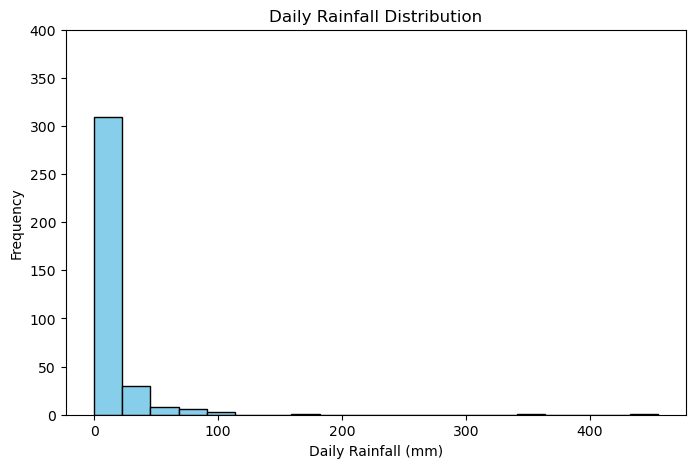

In [25]:
import matplotlib.pyplot as plt

# Histogram for Daily Rainfall
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()


### Questions

1. Describe the shape of the Daily Rainfall distribution. Is it symmetric, positively skewed, or negatively skewed?
2. How might the shape of the histogram reflect the frequency of rainy versus dry days?
3. What happens to the plot when you change the bins to 5? 20? 100? What scenarios would you need more bins? How about less bins?

Answer to Task 3:
1. The Daily Rainfall Distribution is concentrated on the left of the graph/plot. And this represents a positively skewed plot.
2. If there were more rainy days over the dry days, the shape of the histogram still depends on the amount of rainfall. But if dry days is higher than rainy days, it will skewed to the right (positively skewed).
3. Upon changing the bins to 5, the plot/box becomes thicker compared to bins=20, there were only 5 box/plot represent, meaning the range of the values in every containers in every plot/box increased. And when the bins was changed to bins=100, the plot/box became thinner and had 20 numbers of containers, which means, there were 20 ranges of values and had limitted range in every box/plot or container. What's good to note is that, even changing the bins, still the plot is positively skewed. If we wanted to have a finer distribution on the amount of rainfall or any dataset, we should have a larger number of bins, and if we wanted a coarser distribution of data set, we can set a lower value of bins to capture wider area of range. 

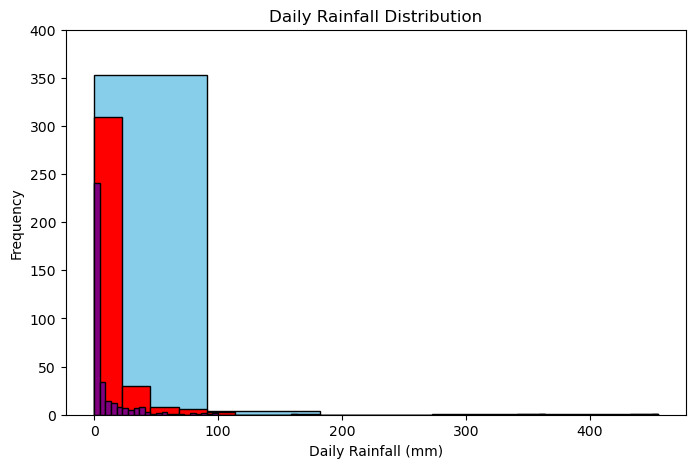

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.hist(df['DAILY RAINFALL'].dropna(), bins=20, color='red', edgecolor='black')
plt.hist(df['DAILY RAINFALL'].dropna(), bins=100, color='purple', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()


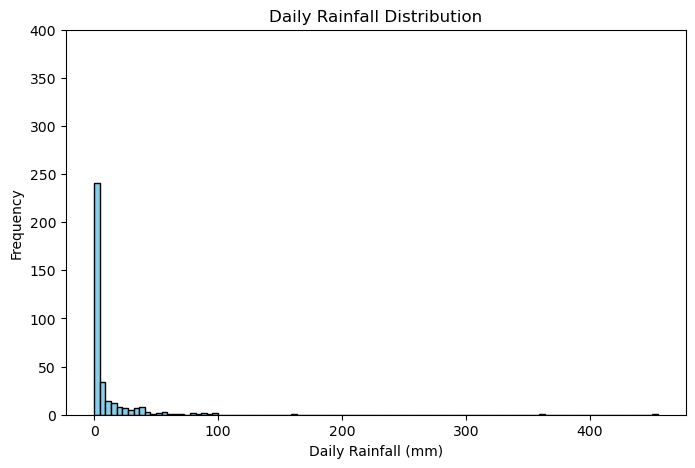

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()

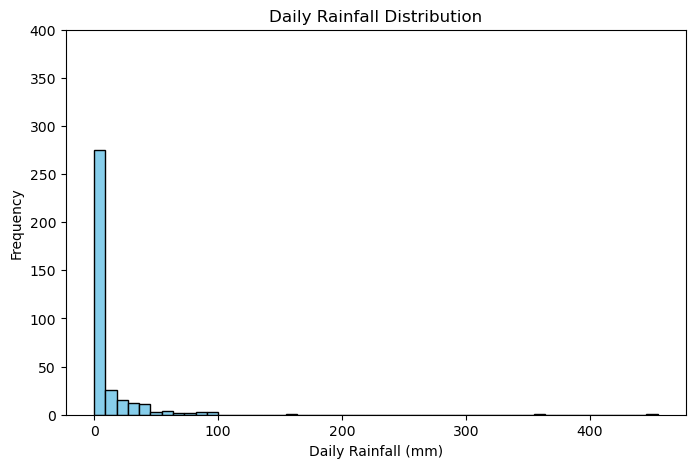

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()

---
## Task 4. Analyze Rainy Days Only
Drop the days with zero rainfall and create a new histogram for `Daily Rainfall`. Compare this histogram to the one in Task 3 to see how excluding zero-rain days changes the distribution.


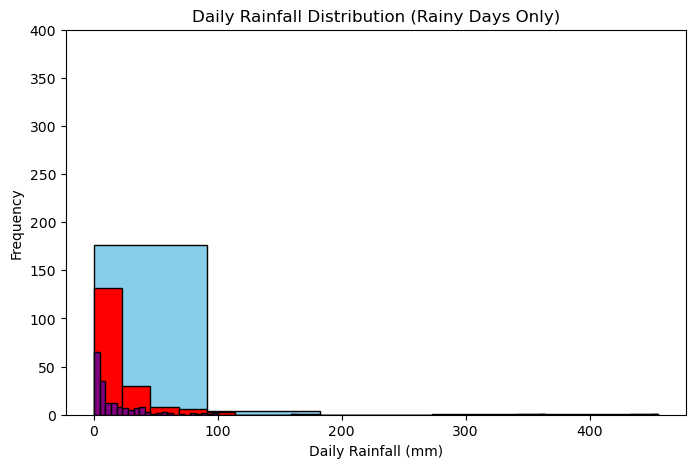

In [47]:
# Create a new DataFrame that only includes days with rainfall
rainy_days_df = df[df['DAILY RAINFALL'] > 0].copy()

# Plot histogram for Daily Rainfall (rainy days only)
plt.figure(figsize=(8, 5))
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=5, color='skyblue', edgecolor='black')
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=20, color='red', edgecolor='black')
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=100, color='purple', edgecolor='black')
plt.title('Daily Rainfall Distribution (Rainy Days Only)')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()


In [63]:
df['DAILY RAINFALL'].mean()

np.float64(11.304768802228411)

In [64]:
df['DAILY RAINFALL'].median()

np.float64(0.254)

In [62]:
rainy_days_df['DAILY RAINFALL'].mean()

np.float64(22.298967032967035)

In [65]:
rainy_days_df['DAILY RAINFALL'].median()

np.float64(7.4929999999999986)

### Questions
1. How does this histogram differ from the previous histogram that included all days?
2. How does excluding zero-rain days affect the mean and median of daily rainfall? HINT: compare `rainy_days_df['DAILY RAINFALL'].mean()` and `df['DAILY RAINFALL'].mean()`. Use additional cells if needed.
3. In what scenarios might it be useful to exclude zero-rain days versus include them?

Answer to Task 4:
1. In terms of patterns, both of the plots were the same (positively skewed). It differs only on the frequency of the distribution. Previous plot (Task 3) have a higher frequency compared to this plot (Task 4). But the difference from bin(1) to next bins [on bin(20) and bin(100)] were lesser compared to previous plot, since the removal of 0 or dry days had been removed that accoounts to a greater bin(1).
2. The values for mean and median changes when zeros (dry days) were removed. Both of the mean and median increased its values, this is because there were number of sample/data that had been removed in the equation for both mean and median, and these data/sample were of great effect since it pulls the value of the dataset down. So from 11.30 mean rainfall, it increased it value to 22.30, while its median score increased from 0.254 to 7.49. And by inspection, its difference is quite significant.
3. Typically, in Meteorology, when talking about rainfall, the usual (and I think proper) treatment for rainfall is to sum it up or get their total values, and in this case, including zeros or dry days will not affect the scenarios.

---
## Task 5: Cumulative Rainfall Over Time
Calculate the cumulative rainfall over time to observe how rainfall accumulates. Plot the cumulative rainfall to identify any trends or periods with significant rainfall.

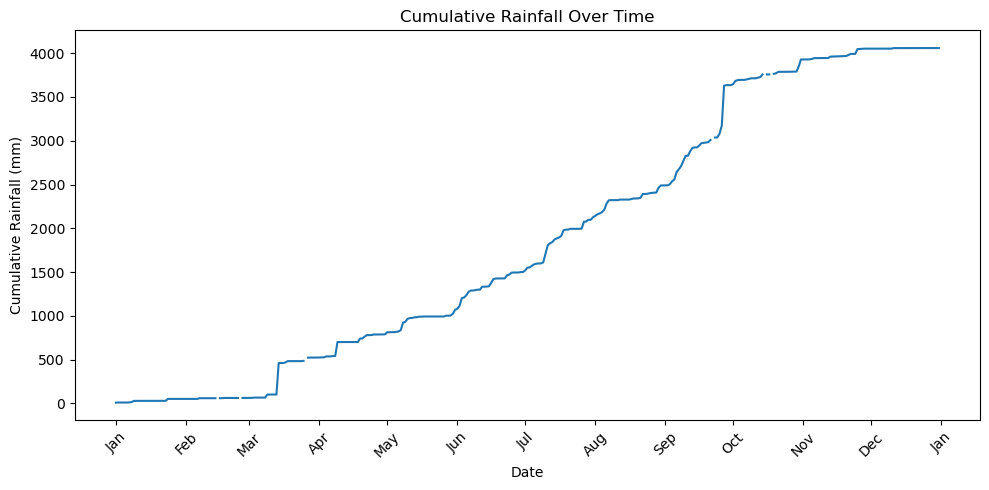

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate cumulative rainfall
df['Cumulative Rainfall'] = df['DAILY RAINFALL'].cumsum()

# Plot cumulative rainfall over time with monthly x-axis ticks
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['Cumulative Rainfall'], color='tab:blue')
plt.title('Cumulative Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (mm)')

# Set x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Month Year'

plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

### Questions

1. Describe the trend of cumulative rainfall over time. Are there any periods with rapid accumulation?
2. What could be some causes for sudden increases in cumulative rainfall?

Answers Task 5:
1. The trend of cumulative rainfall over time is increasing. And on the months of March and late September where the increased were September 27 had 454.91mm one day accumulated rainfall and March 14 had 360.172mm one day accumulated rainfall.
2. A sudden increased in a cumulative rainfall is due to a large amount of rainfall in a day like what happened in Sept 27 and Mar 14 events. For Sept 27, this might due to TC OndoyPh hitting the Metro Manila, while Mar 14 is might be due to isolated rain showers and thunderstorms. And, YES, aside these events (i.e. thunderstorms, rainshowers, tropical cyclone) cause a sudden increase in a cumulative rainfall, since these events last only for few days and at some point have a peak day/time.

---
## Task 6. Handling Outliers in Daily Rainfall
The `Daily Rainfall` data contains several extreme outliers and many zero-rain days. For this part of the exercise:

- First, filter the data to exclude zero-rain days.
- Then, filter out rainfall values above the 95th percentile to remove extreme outliers.
- Plot a new boxplot for the filtered data.
- Compare the summary statistics (mean and median) for:
    - All days (including zero-rain and outliers)
    - Rainy days only (excluding zero-rain)
    - Filtered rainy days (excluding zero-rain and the top 5% of rainfall values)

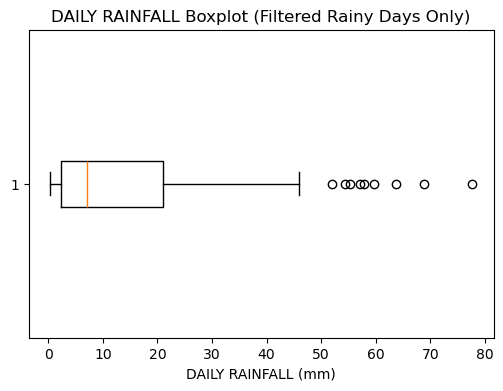

Summary Statistics:
Original Mean (All Days): 11.30 mm
Original Median (All Days): 0.25 mm

Mean (Rainy Days Only): 22.30 mm
Median (Rainy Days Only): 7.49 mm

Filtered Mean (Filtered Rainy Days Only): 14.26 mm
Filtered Median (Filtered Rainy Days Only): 7.11 mm


In [15]:
# Calculate the 95th percentile for DAILY RAINFALL (non-zero only)
threshold = df[df['DAILY RAINFALL'] > 0]['DAILY RAINFALL'].quantile(0.95)

# Filter data to exclude zero-rain days
rainy_days_df = df[df['DAILY RAINFALL'] > 0]

# Further filter to exclude outliers above the 95th percentile
filtered_rainy_days_df = rainy_days_df[rainy_days_df['DAILY RAINFALL'] <= threshold]

# Plot boxplot for filtered DAILY RAINFALL data (rainy days only, no extreme outliers)
plt.figure(figsize=(6, 4))
plt.boxplot(filtered_rainy_days_df['DAILY RAINFALL'], vert=False)
plt.title('DAILY RAINFALL Boxplot (Filtered Rainy Days Only)')
plt.xlabel('DAILY RAINFALL (mm)')
plt.show()

# Summary statistics
# All days (with zeros and outliers)
original_mean = df['DAILY RAINFALL'].mean()
original_median = df['DAILY RAINFALL'].median()

# Rainy days only (no zeros, but includes outliers)
rainy_mean = rainy_days_df['DAILY RAINFALL'].mean()
rainy_median = rainy_days_df['DAILY RAINFALL'].median()

# Filtered rainy days only (no zeros, no extreme outliers)
filtered_mean = filtered_rainy_days_df['DAILY RAINFALL'].mean()
filtered_median = filtered_rainy_days_df['DAILY RAINFALL'].median()

print("Summary Statistics:")
print(f"Original Mean (All Days): {original_mean:.2f} mm")
print(f"Original Median (All Days): {original_median:.2f} mm\n")
print(f"Mean (Rainy Days Only): {rainy_mean:.2f} mm")
print(f"Median (Rainy Days Only): {rainy_median:.2f} mm\n")
print(f"Filtered Mean (Filtered Rainy Days Only): {filtered_mean:.2f} mm")
print(f"Filtered Median (Filtered Rainy Days Only): {filtered_median:.2f} mm")


### Questions
1. Are there any outliers in the `Daily Rainfall` data? If so, what might they represent?
2. How might these outliers affect the mean and median values of rainfall?
3. How do zero-rain days affect the mean and median of rainfall?
4. After filtering out both zero-rain days and the top 5% of rainfall values, how did the mean and median change? What does this suggest about the influence of zero values and extreme values on rainfall statistics?

Answer Task 6:
1. I think, there are some outliers of the data, inlcuding the March 14 event with 360.172mm of rain, because this is dry hot season in the country, unless there was a strong thunderstorm during this day that caused large amount of rain in the location. This outliers represents an event that causes increased or decreased on the dataset's mean and median. Again, this outliers might represent an extreme events like TC activity, thunderstorm and others.
2. This outliers greatly affect the mean and median of the data set. If the outlier is very high (low), the mean increased (decreased) while the location of median rainfall location also varies.
3. If we will not remove the zero-rain days in the dataset, the mean decreases because in the computation of mean, the number/frequency of zero rain days had been included in the divisor in computing the mean. While for the median, if there are too many zeros, the median will be lower in value, since the zeros occupy huge part in the order. So, upon checking in the values, the original mean and median is lower than the filtered mean and median and very much lower if the mean and median is for rainy days only.
4. After filtering out both zero-rainy days and the top5% of rainfall days, the mean and median increased. But the highest changed were observed on rainy days only (mean 22.30mm, median 7.49). This suggests that, upon removing zeros and extreme values, the mean and median will increased (significantly upon removing zeros and considers only rainy days data).

---
## Task 7: Scatter Plot - Temperature vs Rainfall
From the `filtered_rainy_days_df` dataframe, create a scatter plot of `TEMP MEAN` vs. `Daily Rainfall` to explore if there’s any relationship between temperature and rainfall.

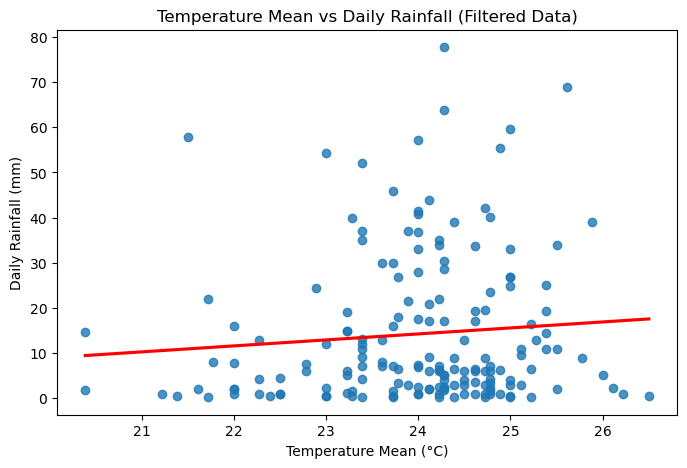

Pearson's Correlation Coefficient: -0.18
P-value: 0.021


In [18]:
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x='TEMP MIN', y='DAILY RAINFALL', data=filtered_rainy_days_df, ci=None, line_kws={"color": "red"})
plt.title("Temperature Mean vs Daily Rainfall (Filtered Data)")
plt.xlabel("Temperature Mean (°C)")
plt.ylabel("Daily Rainfall (mm)")
plt.show()

# Calculate Pearson's correlation coefficient
pearson_corr, p_value = pearsonr(filtered_rainy_days_df['TEMP MEAN'], filtered_rainy_days_df['DAILY RAINFALL'])
print(f"Pearson's Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.3f}")


### Questions
1. What is Pearson’s correlation coefficient between TEMP MEAN and Daily Rainfall? Is it positive, negative, or close to zero?
2. Based on the correlation coefficient and the trend line, do you observe a meaningful relationship between temperature and rainfall for moderate rainy days?
3. How does the trend line help in visualizing the relationship, or lack thereof, between temperature and rainfall?

Answer to Task 7:
1. The Pearson's Correlation Coefficient is -0.18, it is a negative value close to zero. An inverse weak to negligible value of correlation coefficient.
2. Yes, I think when considering only rainfall for moderate rainy days and temperature there is a significant positive trend and the degree of correlation also increased, because the extreme values will be removed.
3. The trendline helps us in visualizing of what is expected to happen to a variable (dependent) when one variable changes (independent). For this output, seems like it is misleading, since the relationship is negative, the direction of the graph must be descending and falling. But in this graph, it is rising. So, for me, the trendline lack thereof in explaining or visualizing the relationship between temperature and rainfall. If its for rainfall trend and temperature trend, the plot might give a better interpretation of rising temperature and rainfall due time.

---
## Task 8: Exploring Seasonal Rainfall Patterns
Group the `Daily Rainfall` data by month to observe seasonal patterns. Calculate the mean rainfall for each month and plot it to see how rainfall changes over the year.

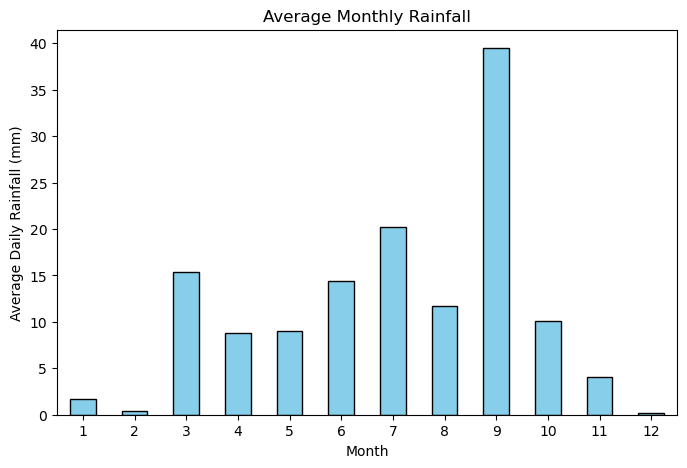

In [19]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly rainfall
monthly_rainfall = df.groupby('Month')['DAILY RAINFALL'].mean()

# Plot mean monthly rainfall
plt.figure(figsize=(8, 5))
monthly_rainfall.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Rainfall")
plt.xlabel("Month")
plt.ylabel("Average Daily Rainfall (mm)")
plt.xticks(rotation=0)
plt.show()


### Questions
1. Which month(s) have the highest average rainfall? What might be causing this seasonal pattern?
2. How does the seasonal variation in rainfall align with your expectations of the climate type for the region?

Answer Task 8:
1. 

---
## Task 9: Exploring Seasonal Temperature Patterns
Create new cells below and repeat Task 8 but for Mean, Minimum, and Maximum temperature. 

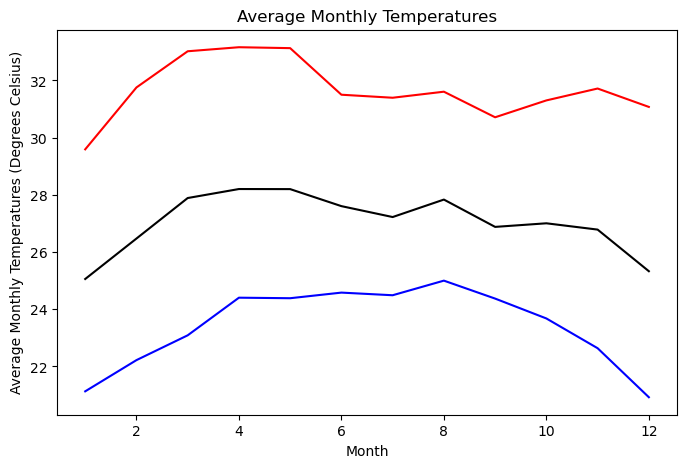

In [29]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly temp
monthly_temp_mean = df.groupby('Month')['TEMP MEAN'].mean()
monthly_temp_min = df.groupby('Month')['TEMP MIN'].mean()
monthly_temp_max = df.groupby('Month')['TEMP MAX'].mean()

# Plot mean monthly temp
plt.figure(figsize=(8, 5))
monthly_temp_mean.plot(kind='line', color='black')
monthly_temp_min.plot(kind='line', color='blue')
monthly_temp_max.plot(kind='line', color='red')
plt.title("Average Monthly Temperatures")
plt.xlabel("Month")
plt.ylabel("Average Monthly Temperatures (Degrees Celsius)")
plt.xticks(rotation=0)
plt.show()

# Calculate min monthly temp
#monthly_temp_min = df.groupby('Month')['TEMP MIN'].mean()

# Plot min monthly temp
#plt.figure(figsize=(8, 5))
#monthly_temp_min.plot(kind='line', color='blue')
#plt.title("Average Monthly Mean Temperature")
#plt.xlabel("Month")
#plt.ylabel("Average Monthly Mean Temperature (Degrees Celsius)")
#plt.xticks(rotation=0)
#plt.show()

# Calculate max monthly temp
#monthly_temp_max = df.groupby('Month')['TEMP MAX'].mean()

# Plot max monthly temp
#plt.figure(figsize=(8, 5))
#monthly_temp_max.plot(kind='line', color='red')
#plt.title("Average Monthly Mean Temperature")
#plt.xlabel("Month")
#plt.ylabel("Average Monthly Mean Temperature (Degrees Celsius)")
#plt.xticks(rotation=0)
#plt.show()



### Questions
1. Which month(s) have the highest maximum temperature? Lowest minimum temperature? What might be causing this seasonal pattern?

---

### Final Questions
1. Did you notice any clear seasonal patterns or shifts in the data? (e.g., sudden increases in rain, changes in temperature ranges, etc.)
2. Are there any "unusual" days in the data?
    - What variables made them stand out?
    - How would you check if they were real or just data entry errors?
3. If you had to describe this year’s weather to someone who didn't live through it, what key patterns or features would you mention?
4. What questions can we answer confidently with one year of data? What kinds of questions would require more years for better context?
5. Which variable would you want to visualize next, and what would you hope to find?